# Project : MNIST (Number Classification)


In [3]:
# Install all dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl


from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dense, Dropout, MaxPool2D, AvgPool2D, Reshape, Flatten

In [4]:
BASE_DIR = '/kaggle/input/digit-recognizer'
TRAIN_DATASET = BASE_DIR + '/train.csv'
TESTING_DATASET = BASE_DIR + '/test.csv'

In [5]:
# load image dataset
mnist_train = pd.read_csv(TRAIN_DATASET)
mnist_test = pd.read_csv(TESTING_DATASET)

In [6]:
# PREPARED DATA FOR MODEL
Y_train = mnist_train["label"]
X_train = mnist_train.drop(labels = ["label"],axis = 1)

X_train = X_train / 255.0
X_test = mnist_test / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [7]:
# construct the images
def construct_digit_image(digit_image):
    digit_image = np.array(digit_image)
    _digit = digit_image.reshape(28,28)
    plt.imshow(_digit, cmap=plt.cm.binary)
    plt.show()

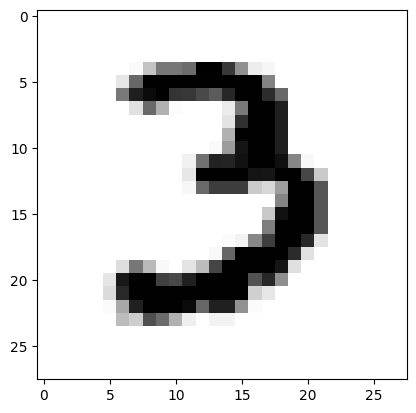

In [8]:
construct_digit_image(X_train[9])

In [9]:
# perform Data Augmentation -- creating new digit images with somes rotates, tiltation, varies in alignments, etc
datagenerator = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1 
)

In [10]:
# split the dataset into traning and validation data
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)


In [11]:
# BUILD CONVOLUTIONAL NEURAL NETWORK
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, activation = 'relu', padding = 'same', strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, activation = 'relu', padding = 'same', strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# HISTORY BASE
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
history = model.fit(X_train2, y_train2, batch_size = 64, epochs = 35, validation_data = (X_val2, y_val2), callbacks = [annealer], verbose = 0, steps_per_epoch = X_train2.shape[0]//64)
print(f"Train accuracy={max(history.history['accuracy']):.5f}, Validation accuracy={max(history.history['val_accuracy']):.5f}")

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)



/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Train accuracy=0.99676, Validation accuracy=0.99548


In [16]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64), validation_data=(X_val2, y_val2),epochs=25, steps_per_epoch=X_train.shape[0]//64, callbacks=[annealer], verbose=0)
print(f"Train accuracy={max(history.history['accuracy']):.5f}, Validation accuracy={max(history.history['val_accuracy']):.5f}")

Train accuracy=1.00000, Validation accuracy=0.99940


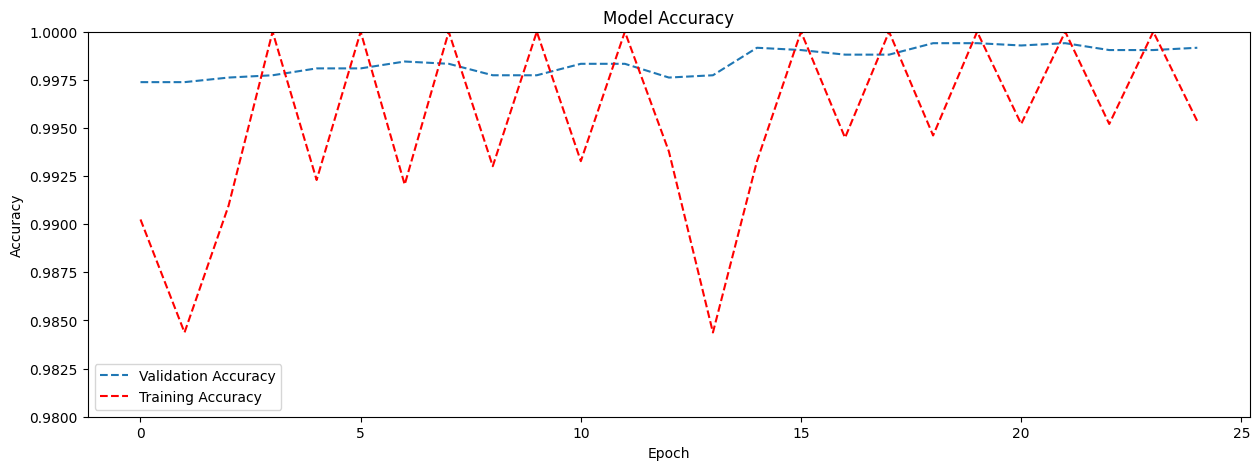

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['val_accuracy'], linestyle='--', label='Validation Accuracy')
plt.plot(history.history['accuracy'], linestyle='--', color='red', label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0.98, 1])  
plt.legend()  
plt.show()


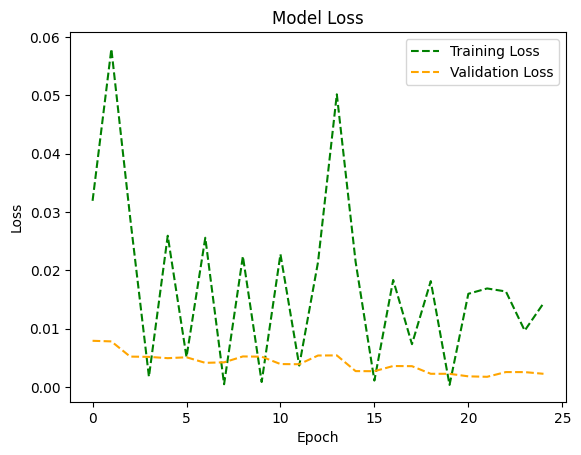

In [18]:
plt.plot(history.history['loss'], linestyle='--', color='green', label='Training Loss')
plt.plot(history.history['val_loss'], linestyle='--', color='orange', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
mnist_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


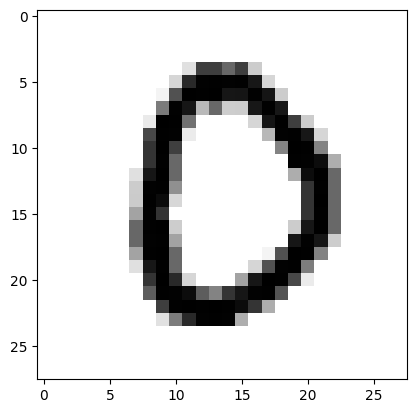

In [35]:
digit = mnist_test.iloc[19]
construct_digit_image(digit)

In [27]:
y_pred = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


### Testing model on testing data


In [38]:
def Digit_Classifier(training_sample_index:int, y_pred):
    digit = mnist_test.iloc[training_sample_index]
    construct_digit_image(digit)
    print(f"The Number in image is: {np.argmax(y_pred[training_sample_index])}")

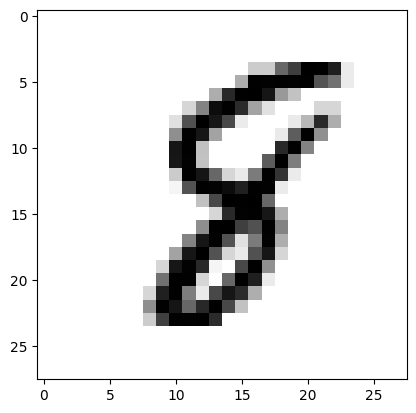

The Number in image is: 8


In [47]:
Digit_Classifier(145, y_pred)